## CME 257 Homework 3

#### Oct 27, 2019
#### Davide Giovanardi
#### Julia 1.2.0
#### TimeSeries package

In [ ]:
#Pkg.add("TimeSeries")
#Pkg.add("MarketData");

In [10]:
using TimeSeries
using MarketData # historical data set
;

`indexing` to select only open and close price and a specific time period

In [54]:
prices = AAPL[:Open, :High, :Low, :Close][Date(2000, 1, 1):Day(1):Date(2010, 1, 1)]

2515×4 TimeArray{Float64,2,Date,Array{Float64,2}} 2000-01-03 to 2009-12-31
│            │ Open   │ High   │ Low    │ Close  │
├────────────┼────────┼────────┼────────┼────────┤
│ 2000-01-03 │ 104.88 │ 112.5  │ 101.69 │ 111.94 │
│ 2000-01-04 │ 108.25 │ 110.62 │ 101.19 │ 102.5  │
│ 2000-01-05 │ 103.75 │ 110.56 │ 103.0  │ 104.0  │
│ 2000-01-06 │ 106.12 │ 107.0  │ 95.0   │ 95.0   │
│ 2000-01-07 │ 96.5   │ 101.0  │ 95.5   │ 99.5   │
│ 2000-01-10 │ 102.0  │ 102.25 │ 94.75  │ 97.75  │
│ 2000-01-11 │ 95.94  │ 99.38  │ 90.5   │ 92.75  │
│ 2000-01-12 │ 95.0   │ 95.5   │ 86.5   │ 87.19  │
│ 2000-01-13 │ 94.48  │ 98.75  │ 92.5   │ 96.75  │
│ 2000-01-14 │ 100.0  │ 102.25 │ 99.38  │ 100.44 │
│ 2000-01-18 │ 101.0  │ 106.0  │ 100.44 │ 103.94 │
│ 2000-01-19 │ 105.62 │ 108.75 │ 103.38 │ 106.56 │
   ⋮
│ 2009-12-16 │ 195.1  │ 196.5  │ 194.55 │ 195.03 │
│ 2009-12-17 │ 194.26 │ 195.0  │ 191.0  │ 191.86 │
│ 2009-12-18 │ 193.17 │ 195.5  │ 192.6  │ 195.43 │
│ 2009-12-21 │ 196.05 │ 199.75 │ 195.67 │ 198.23 │
│ 

`findwhen` is a filter that allows to easily compare fields, e.g. open and close prices <br>
returns the dates in which the conditions is true

In [55]:
findwhen(prices[:Close] .> prices[:Open])

1266-element Array{Date,1}:
 2000-01-03
 2000-01-05
 2000-01-07
 2000-01-13
 2000-01-14
 2000-01-18
 2000-01-19
 2000-01-25
 2000-01-26
 2000-01-27
 2000-01-31
 2000-02-03
 2000-02-04
 ⋮         
 2009-11-20
 2009-11-23
 2009-11-27
 2009-12-08
 2009-12-09
 2009-12-14
 2009-12-18
 2009-12-21
 2009-12-22
 2009-12-23
 2009-12-24
 2009-12-30

we can use this a mask to get the data that we are interested in

In [56]:
profit = findwhen(prices[:Close] .> prices[:Open])
prices[profit]

1266×4 TimeArray{Float64,2,Date,Array{Float64,2}} 2000-01-03 to 2009-12-30
│            │ Open   │ High   │ Low    │ Close  │
├────────────┼────────┼────────┼────────┼────────┤
│ 2000-01-03 │ 104.88 │ 112.5  │ 101.69 │ 111.94 │
│ 2000-01-05 │ 103.75 │ 110.56 │ 103.0  │ 104.0  │
│ 2000-01-07 │ 96.5   │ 101.0  │ 95.5   │ 99.5   │
│ 2000-01-13 │ 94.48  │ 98.75  │ 92.5   │ 96.75  │
│ 2000-01-14 │ 100.0  │ 102.25 │ 99.38  │ 100.44 │
│ 2000-01-18 │ 101.0  │ 106.0  │ 100.44 │ 103.94 │
│ 2000-01-19 │ 105.62 │ 108.75 │ 103.38 │ 106.56 │
│ 2000-01-25 │ 105.0  │ 113.12 │ 102.38 │ 112.25 │
│ 2000-01-26 │ 110.0  │ 114.19 │ 109.75 │ 110.19 │
│ 2000-01-27 │ 108.81 │ 113.0  │ 107.0  │ 110.0  │
│ 2000-01-31 │ 101.0  │ 103.88 │ 94.5   │ 103.75 │
│ 2000-02-03 │ 100.31 │ 104.25 │ 100.25 │ 103.31 │
   ⋮
│ 2009-11-23 │ 203.0  │ 206.0  │ 202.95 │ 205.88 │
│ 2009-11-27 │ 199.22 │ 202.96 │ 198.37 │ 200.59 │
│ 2009-12-08 │ 189.36 │ 192.35 │ 188.7  │ 189.87 │
│ 2009-12-09 │ 191.28 │ 198.16 │ 190.31 │ 197.8  │
│ 

`lag` is a common operation used in time-series analysis, e.g. ARMA models. This package makes it easy to return a lagged series

In [61]:
lag(prices[1:10])

9×4 TimeArray{Float64,2,Date,Array{Float64,2}} 2000-01-04 to 2000-01-14
│            │ Open   │ High   │ Low    │ Close  │
├────────────┼────────┼────────┼────────┼────────┤
│ 2000-01-04 │ 104.88 │ 112.5  │ 101.69 │ 111.94 │
│ 2000-01-05 │ 108.25 │ 110.62 │ 101.19 │ 102.5  │
│ 2000-01-06 │ 103.75 │ 110.56 │ 103.0  │ 104.0  │
│ 2000-01-07 │ 106.12 │ 107.0  │ 95.0   │ 95.0   │
│ 2000-01-10 │ 96.5   │ 101.0  │ 95.5   │ 99.5   │
│ 2000-01-11 │ 102.0  │ 102.25 │ 94.75  │ 97.75  │
│ 2000-01-12 │ 95.94  │ 99.38  │ 90.5   │ 92.75  │
│ 2000-01-13 │ 95.0   │ 95.5   │ 86.5   │ 87.19  │
│ 2000-01-14 │ 94.48  │ 98.75  │ 92.5   │ 96.75  │

`diff` computes the difference between consecutive prices

In [63]:
diff(prices[1:10])

9×4 TimeArray{Float64,2,Date,Array{Float64,2}} 2000-01-04 to 2000-01-14
│            │ Open  │ High  │ Low   │ Close │
├────────────┼───────┼───────┼───────┼───────┤
│ 2000-01-04 │ 3.37  │ -1.88 │ -0.5  │ -9.44 │
│ 2000-01-05 │ -4.5  │ -0.06 │ 1.81  │ 1.5   │
│ 2000-01-06 │ 2.37  │ -3.56 │ -8.0  │ -9.0  │
│ 2000-01-07 │ -9.62 │ -6.0  │ 0.5   │ 4.5   │
│ 2000-01-10 │ 5.5   │ 1.25  │ -0.75 │ -1.75 │
│ 2000-01-11 │ -6.06 │ -2.87 │ -4.25 │ -5.0  │
│ 2000-01-12 │ -0.94 │ -3.88 │ -4.0  │ -5.56 │
│ 2000-01-13 │ -0.52 │ 3.25  │ 6.0   │ 9.56  │
│ 2000-01-14 │ 5.52  │ 3.5   │ 6.88  │ 3.69  │

`upto` is a cumulative sum up to a certain date, useful to sum returns

In [64]:
earnings = diff(prices[1:100])
upto(sum, earnings)

99×4 TimeArray{Float64,2,Date,Array{Float64,2}} 2000-01-04 to 2000-05-24
│            │ Open   │ High   │ Low    │ Close  │
├────────────┼────────┼────────┼────────┼────────┤
│ 2000-01-04 │ 3.37   │ -1.88  │ -0.5   │ -9.44  │
│ 2000-01-05 │ -1.13  │ -1.94  │ 1.31   │ -7.94  │
│ 2000-01-06 │ 1.24   │ -5.5   │ -6.69  │ -16.94 │
│ 2000-01-07 │ -8.38  │ -11.5  │ -6.19  │ -12.44 │
│ 2000-01-10 │ -2.88  │ -10.25 │ -6.94  │ -14.19 │
│ 2000-01-11 │ -8.94  │ -13.12 │ -11.19 │ -19.19 │
│ 2000-01-12 │ -9.88  │ -17.0  │ -15.19 │ -24.75 │
│ 2000-01-13 │ -10.4  │ -13.75 │ -9.19  │ -15.19 │
│ 2000-01-14 │ -4.88  │ -10.25 │ -2.31  │ -11.5  │
│ 2000-01-18 │ -3.88  │ -6.5   │ -1.25  │ -8.0   │
│ 2000-01-19 │ 0.74   │ -3.75  │ 1.69   │ -5.38  │
│ 2000-01-20 │ 10.62  │ 9.0    │ 11.81  │ 1.56   │
   ⋮
│ 2000-05-10 │ -0.82  │ -7.5   │ -2.94  │ -12.63 │
│ 2000-05-11 │ -3.5   │ -8.25  │ -2.69  │ -9.13  │
│ 2000-05-12 │ 1.12   │ -2.0   │ 3.08   │ -4.32  │
│ 2000-05-15 │ 3.18   │ -4.44  │ -1.57  │ -10.94 │
│ 20

Visualize stock price

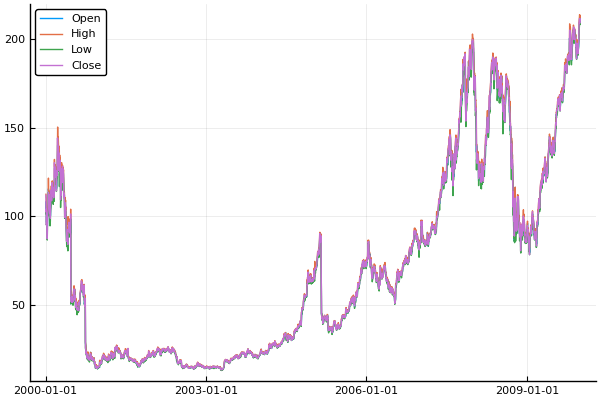

In [57]:
using Plots
pyplot()
plot(prices)